# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Helper Functions

In [2]:
def get_close(ticker, start='19950101'):
    df = pd.read_csv(f'./prices/{ticker}.csv', 
                     index_col=0, parse_dates=True).loc[start:]
    close = df['Adj Close'].rename(ticker)
    return close

# Parameters

In [3]:
stk_ticker='SPY' 
iv_ticker='^VIX'
roll_d=21
lag_d=21

# Load Data

In [4]:
# stock price
cl_0 = get_close(stk_ticker)
# implied volatility
iv_0 = get_close(iv_ticker, start=cl_0.index[0])/100

In [5]:
# actual volatility
lndiff_0 = np.log(cl_0).diff()
std_annl_roll_0 = lndiff_0.rolling(roll_d).std() * np.sqrt(252)
std_annl_roll_t = std_annl_roll_0.shift(-lag_d)
# analysis
implied_vs_actual_diff = (iv_0 - std_annl_roll_t).dropna()
over_est = implied_vs_actual_diff>0
over_est_count = over_est.sum()
over_est_rate = over_est_count/len(over_est)

# Implied Volatility vs Actual Volatility

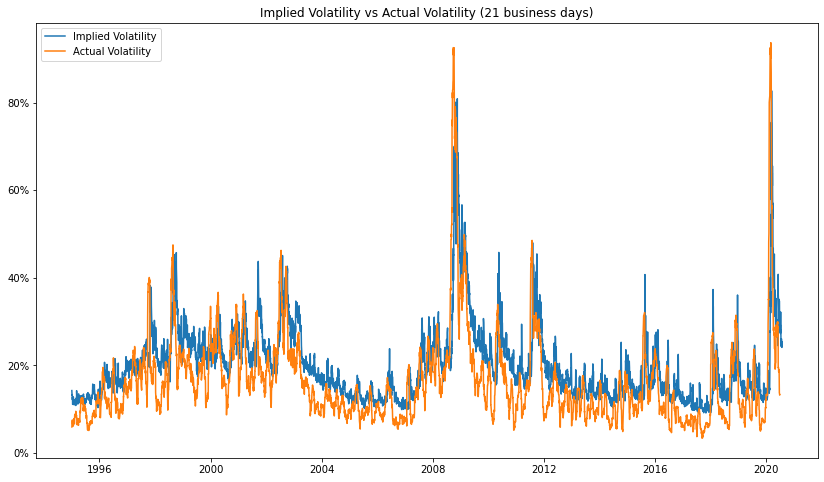

In [6]:
fig0, ax0 = plt.subplots(1,1, figsize=(14,8))
ax0.set_title(f'Implied Volatility vs Actual Volatility ({roll_d} business days)')
ax0.plot(iv_0, label='Implied Volatility')
ax0.plot(std_annl_roll_t, label='Actual Volatility')
ax0.legend()
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Difference of Implied and Actual Volatility

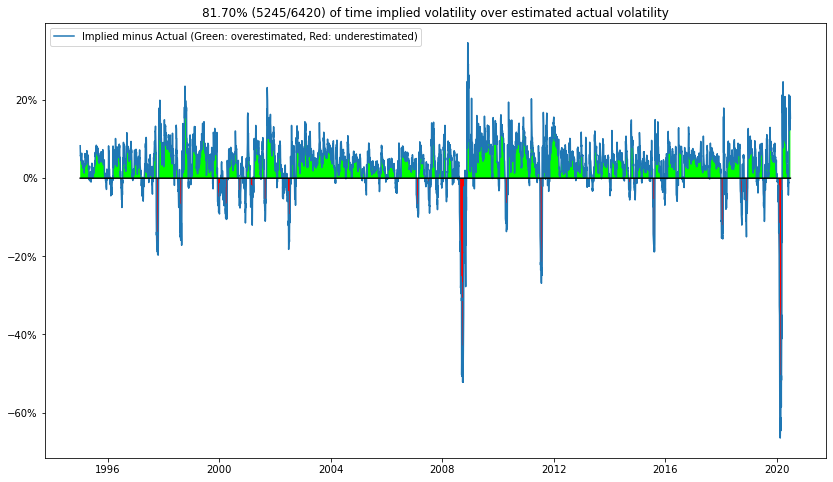

In [7]:
fig1, ax1 = plt.subplots(1,1, figsize=(14,8))
ax1.set_title(f'{over_est_rate:.2%} ({over_est_count}/{len(over_est)}) of time implied volatility over estimated actual volatility')
ax1.plot(implied_vs_actual_diff, label='Implied minus Actual (Green: overestimated, Red: underestimated)')
ax1_hline_zero = pd.Series(0, index=implied_vs_actual_diff.index)
ax1.plot(ax1_hline_zero, c='k')
# format chart
for color, cond in {'#00FF00': (implied_vs_actual_diff>0), '#FF0000':(implied_vs_actual_diff<0)}.items():
    ax1.fill_between(ax1_hline_zero.index, implied_vs_actual_diff, ax1_hline_zero,
                     where=cond, facecolor=color, interpolate=True)
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))